# STAT 207 Group Lab Assignment 2 - [10 total points]

## Finding Missing Data and Answering Questions

<hr>

## <u>Lab Grading</u>:

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

**grade this submission**

If you said **my submission is under netID** above, we will not read any more of your lab submission.

If you said **grade this submission** above, who worked with you on this submission?  Write both their **names** and **netIDs**.  Also, record if you've played Steam before + your favorite game (on Steam, if you have one, or outside of Steam if not).

Stacy Yang: stacyy2 (no exprience to play Steam)

Kerr Tu: kerrtu2 (played it before)

## <u>Purpose</u>:
You should work in groups of 2-3 on this report (not working in groups without permission will result in a point deduction). The purpose of this group lab assignment is to understand and wrangle data, so that it would be ready and prepared for future analysis.
<hr>

## <u>Assignment Instructions</u>:

### Group Roles

You are expected to work in groups of 2-3 on this report.  Since you are working in groups, you may find it helpful to have specified roles.  Below, I provide roles that can be used for groups of 2 and for groups of 3.  I encourage you to switch roles within this lab report, as possible.  I also encourage you to switch roles for each subsequent lab, as possible, based on your group membership.  

#### Groups of 2

* **Driver**: This student will type the report.  While typing the report, you may be the one who is selecting the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  Specific ways to help may include: outlining the general steps needed to solve a question (providing the overview), locating examples within the course notes, and reviewing each line of code as it is typed.

#### Groups of 3

* **Driver**: This student will type the report.  They may also be the one to select the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  They may select the general approach to answering the question and/or a few steps to be completed along the way. 
* **Communicator**: This student will review the report (as it is typed) to ensure that it is clear and concise.  This student may also locate relevant examples within the course notes that may help complete the assignment.

<hr>

### Imports

In [3]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

## Steam Data

Steam is the world's most popular PC Gaming hub. They have a massive catalog of games, with everything from AAA blockbusters to small indie titles.  

You are a team of data scientists working for Steam, and you are responsible for completing analysis for a report that will go to the executives of Valve (the parent company for Steam).  

Unfortunately, the data were collected with a less than optimal structure.  The dataset is comprised of transactions within the Steam platform for a random sample of 500 steam users along with their purchase and game play behaviors.  It has the following columns:
* user_id,
* game_name,
* activity:
    - purchase: indicating that the user has *purchased* the corresponding game
    - play: indicating that the user has *played* the corresponding game (for at least some amount of time.) 
* hours_played_if_play:
    - if the row corresponds to a 'play' activity, this number represents the number of hours the user has played the game
    - if the row corresponds to a 'purchase' activity, this number is always a 1 (and means nothing... it's a placeholder).

Note that for each user-game combo, there will either be one row (if the game has only been purchased but not played) or two rows (if the game has been both purchased and played).  For example, if I bought Portal, a row would be added to the data representing the purchase of that game by me.  When I open the game and start playing it, a second row would be added to the data representing that I have played the game along with recording my play time for that specific game.

### 1. [1 point] Reading in the Data

First, read the steam_sample.csv file into a dataframe.  Display the first five rows and the number of observations in the data.

Be sure to note the structure of the data (especially how the first two rows relate to each other) when observing the data.

In [198]:
df = pd.read_csv("steam_sample.csv")

In [200]:
df.head()

,user_id,game_name,activity,hours_played_if_play
0,308653033,Unturned,purchase,1
1,308653033,Unturned,play,0.6
2,308653033,theHunter,purchase,1
3,144004384,Dota 2,purchase,1
4,144004384,Dota 2,play,22


### 2. [3 points] Preparing the Data

In order to prepare the data effectively, perform the following steps:

1. Identify any values (if any) that have been encoded in the csv to represent a **missing value**.  
2. Make sure that Python reads these missing values correctly.  
3. Report the number of rows that have missing values and the proportion of rows with missing values.
4. Drop any observations with missing values.

In [202]:
# look the data
df.isna().sum()

user_id                 0
game_name               0
activity                0
hours_played_if_play    0
dtype: int64

In [204]:
df['hours_played_if_play'].unique()

array(['1', '0.6', '22', '1028', '1008', '148', '108', '72', '36', '35',
       '32', '21', '16', '15.8', '8.6', '7.8', '7.3', '3.1', '1.9', '1.7',
       '1.1', '0.4', '153', '63', '26', '1.4', '639', '479', '70', '65',
       '33', '30', '19.8', '16.2', '11.3', '4.2', '3.9', '2.3', '0.8',
       '0.7', '0.5', '0.3', '396', '227', '13.4', '12.6', '11.2', '10.1',
       '2.4', '210', '1.2', '0.2', '13.2', '48', '110', '0.1', '67',
       '429', '5.5', '61', '1.6', '18.3', '9.9', '4.7', '1714', '441',
       '197', '147', '117', '86', '73', '49', '46', '31', '24', '20',
       '19.7', '18.2', '14.2', '11.6', '9.8', '9.7', '8.4', '6.5', '4.8',
       '4.1', '3.7', '2.9', '2.7', '2.1', '222', 'unknown', '14.9',
       '14.1', '83', '11.1', '3.2', '6.9', '395', '251', '9.3', '7.4',
       '54', '34', '1.8', '99', '98', '96', '29', '27', '23', '19.1',
       '18.7', '17.5', '17', '16.6', '14.7', '13.3', '10.7', '10.2', '10',
       '9.6', '9.5', '8', '7.9', '7.6', '7', '6.6', '6', '5.8', '5

In [3]:
# "unknown"and blank ('') to NAN value
df['hours_played_if_play'] = df['hours_played_if_play'].replace(["unknown", "", " "], pd.NA)

# drop all of columns which has na value
df_cleaned = df.dropna(subset=['hours_played_if_play'])

NameError: name 'df' is not defined

In [1]:
# change data type to float
df_cleaned["hours_played_if_play"]= df_cleaned["hours_played_if_play"].astype(float)

NameError: name 'df_cleaned' is not defined

In [210]:
df_cleaned = df_replaced.dropna(subset=['hours_played_if_play'])

In [212]:
df_cleaned

,user_id,game_name,activity,hours_played_if_play
0,308653033,Unturned,purchase,1
1,308653033,Unturned,play,0.6
2,308653033,theHunter,purchase,1
3,144004384,Dota 2,purchase,1
4,144004384,Dota 2,play,22
...,...,...,...,...
7801,99096740,SimCity 4 Deluxe,play,0.2
7802,99096740,BioShock Infinite Burial at Sea - Episode 2,purchase,1
7803,99096740,The Elder Scrolls V Skyrim - Dawnguard,purchase,1
7804,99096740,The Elder Scrolls V Skyrim - Dragonborn,purchase,1


In [214]:
df_cleaned["hours_played_if_play"].unique()

array(['1', '0.6', '22', '1028', '1008', '148', '108', '72', '36', '35',
       '32', '21', '16', '15.8', '8.6', '7.8', '7.3', '3.1', '1.9', '1.7',
       '1.1', '0.4', '153', '63', '26', '1.4', '639', '479', '70', '65',
       '33', '30', '19.8', '16.2', '11.3', '4.2', '3.9', '2.3', '0.8',
       '0.7', '0.5', '0.3', '396', '227', '13.4', '12.6', '11.2', '10.1',
       '2.4', '210', '1.2', '0.2', '13.2', '48', '110', '0.1', '67',
       '429', '5.5', '61', '1.6', '18.3', '9.9', '4.7', '1714', '441',
       '197', '147', '117', '86', '73', '49', '46', '31', '24', '20',
       '19.7', '18.2', '14.2', '11.6', '9.8', '9.7', '8.4', '6.5', '4.8',
       '4.1', '3.7', '2.9', '2.7', '2.1', '222', '14.9', '14.1', '83',
       '11.1', '3.2', '6.9', '395', '251', '9.3', '7.4', '54', '34',
       '1.8', '99', '98', '96', '29', '27', '23', '19.1', '18.7', '17.5',
       '17', '16.6', '14.7', '13.3', '10.7', '10.2', '10', '9.6', '9.5',
       '8', '7.9', '7.6', '7', '6.6', '6', '5.8', '5.6', '5.3',

### 3. [1 point] Interpreting Missing Data

We dropped observations above that had any missing values.  Are you concerned that the decision to drop observations as the way to handle missing data may not have been best?  Briefly explain.

If number of the samples is not big enough or the missing values stands for big ratio, we can't drop them.

### 4. [1 point] Separate the Data

In this analysis, we would like to answer questions based on purchases and based on play time.  Create two new dataframes:

- one that is comprised of the purchase rows for the games that were purchased
- one that is comprised of the play rows for the games that were played

You can call these anything that you want, but one option is to call them df_purchase and df_play.

In [69]:
df_purchase = df[df['activity'] == 'purchase']
df_purchase

,user_id,game_name,activity,hours_played_if_play
0,308653033,Unturned,purchase,1
2,308653033,theHunter,purchase,1
3,144004384,Dota 2,purchase,1
5,54103616,Counter-Strike Global Offensive,purchase,1
7,54103616,Counter-Strike,purchase,1
...,...,...,...,...
7800,99096740,SimCity 4 Deluxe,purchase,1
7802,99096740,BioShock Infinite Burial at Sea - Episode 2,purchase,1
7803,99096740,The Elder Scrolls V Skyrim - Dawnguard,purchase,1
7804,99096740,The Elder Scrolls V Skyrim - Dragonborn,purchase,1


In [72]:
df_play = df[df['activity'] == 'play']
df_play

,user_id,game_name,activity,hours_played_if_play
1,308653033,Unturned,play,0.6
4,144004384,Dota 2,play,22
6,54103616,Counter-Strike Global Offensive,play,1028
8,54103616,Counter-Strike,play,1008
10,54103616,Left 4 Dead,play,148
...,...,...,...,...
7793,99096740,Crysis,play,5.3
7795,99096740,Assassin's Creed II,play,2.7
7797,99096740,Hitman Blood Money,play,1.3
7799,99096740,The Binding of Isaac Rebirth,play,0.7


### 5. [2 points] Purchasing to Playing?

**a)** Overall, of all of the purchases represented in this data, what proportion have been played?  Of all the purchases in the data, what proportion remain "unopened", that is, unplayed?

In [106]:
proportion_1 = 4976/7806
proportion_1

0.6374583653599795

**b)** What factors do you anticipate might affect whether a given game is played or not after being purchased?

peers feedback, advertisement, successive update

### 6. [2 points] Game Play Time Question

**a)** Review the amount of time played for each row (user-game combination).  You will want to summarize the time played variable.  You may also want to explore some of the extreme tails (very small or very large values) using visualizations and/or examining the specific values.

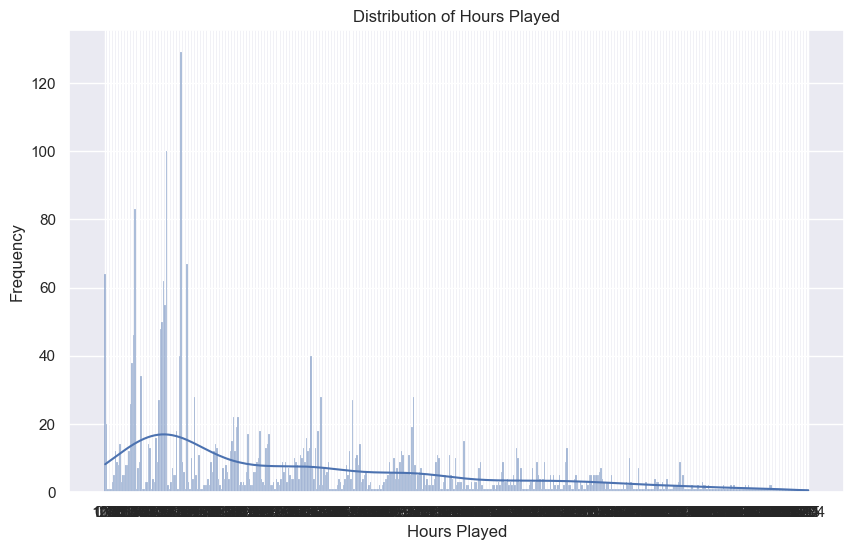

In [217]:
plt.figure(figsize=(10,6))
sns.histplot(df_play["hours_played_if_play"], bins=50, kde=True)
plt.xlabel("Hours Played")
plt.ylabel("Frequency")
plt.title("Distribution of Hours Played")
plt.show()

In [229]:
df_play["hours_played_if_play"] = pd.to_numeric(df_play["hours_played_if_play"], errors="coerce")
df_play = df_play.dropna(subset=["hours_played_if_play"])

In [233]:
df_play["hours_played_if_play"] = df_play["hours_played_if_play"].astype(float)

# highest playtime (5)
df_play.nlargest(5, 'hours_played_if_play')

/var/folders/sk/z_0pn_9x6l10hpn8467x_wzc0000gn/T/ipykernel_56117/1849333535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_play["hours_played_if_play"] = df_play["hours_played_if_play"].astype(float)


,user_id,game_name,activity,hours_played_if_play
5106,73017395,Sid Meier's Civilization V,play,11754.0
531,32749624,Counter-Strike,play,4814.0
1592,43684632,Counter-Strike Global Offensive,play,3626.0
769,99077905,Dota 2,play,3309.0
4278,48798067,Mount & Blade Warband,play,3178.0


In [235]:
# lowest playtime(5)
df_play.nsmallest(5, 'hours_played_if_play')

,user_id,game_name,activity,hours_played_if_play
170,214388411,Realm of the Mad God,play,0.1
568,257422299,Metal Reaper Online,play,0.1
570,257422299,Golden Rush,play,0.1
668,35729292,Trove,play,0.1
724,185914106,Velvet Sundown,play,0.1


**b)** Are there any of these values that you suspect may not be accurate?  Explain.  

When we look at the five largest playtime games, **11754** hours can be not accurate. That is unrealistic unless the game was left running continuously. However, when we look at the lowest 5 playtime games, **0.1** hours can be not accurate. It can be recorded by just turn on the game for just few seconds. These extreme values can suggest that the data would be biased. 